In [67]:
import xarray as xr

#load the files containing the multimodel data
vars=['tas','hur','prw','ta']

data=[]
for var in vars:
    path=f'/home/bernatj/Data/postprocessed-cmip6/interpolated-2.5deg-multimodel/{var}/'
    da = xr.load_dataset(path+f'{var}_multimodel_mean.nc')
    data.append(da)

ds = xr.merge(data)

In [68]:
def flip_lon_360_2_180(var_360, lon):
    """
    This function shifts the longitude dimension from [0,360] to [-180,180].
    """
    try:
        var_180 = var_360.assign_coords(lon=(lon + 180) % 360 - 180)
        var_180 = var_180.sortby(var_180.lon)
    except:
        var_180 = var_360.assign_coords(longitude=(lon + 180) % 360 - 180)
        var_180 = var_180.sortby(var_180.longitude)

    return var_180


In [69]:
ds = flip_lon_360_2_180(ds, ds.lon)

In [70]:
ds

<xarray.Dataset> Size: 20MB
Dimensions:    (time: 12, bnds: 2, lat: 72, lon: 144, plev: 19)
Coordinates:
  * time       (time) datetime64[ns] 96B 2014-01-16T12:00:00 ... 2014-12-16T1...
  * lat        (lat) float64 576B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
    height     float64 8B 2.0
  * plev       (plev) float64 152B 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
  * lon        (lon) float64 1kB -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 192B 1980-01-01 ... 2015-01-01
    tas        (time, lat, lon) float32 498kB 1.143 1.206 1.184 ... 4.525 4.528
    hur        (time, plev, lat, lon) float32 9MB -0.6676 -0.6614 ... -0.2619
    prw        (time, lat, lon) float32 498kB 0.05422 0.05437 ... 0.2996 0.2988
    ta         (time, plev, lat, lon) float32 9MB 1.395 1.395 ... -2.548 -2.547
Attributes: (12/47)
    CDI:                    Climate Data Interface version 2.0.5 (https://mpi...
    source:                 EC-Earth3-Veg-LR (2019): \naerosol: none\natmos: ...
    institution:            AEMET, Spain; BSC, Spain; CNR-ISAC, Italy; DMI, D...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    ...                     ...
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by EC-Earth-Consortium ...
    cmor_version:           3.5.0
    branch_time_in_parent:  164359.0
    tracking_id:            hdl:21.14100/6c09483e-fbd7-4ea4-818a-f12b6fcba5b4
    CDO:                    Climate Data Operators version 2.0.5 (https://mpi...

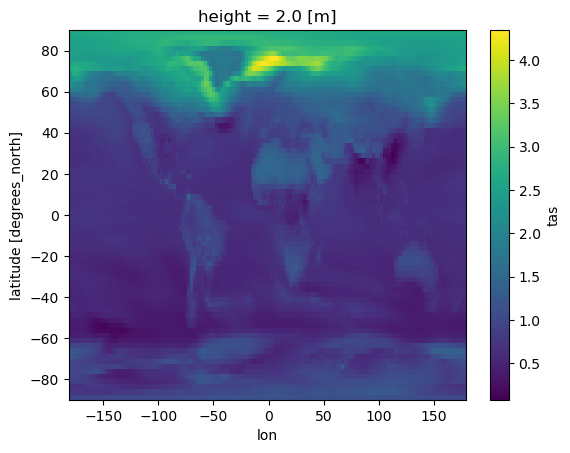

In [71]:
ds.tas.mean('time').plot()

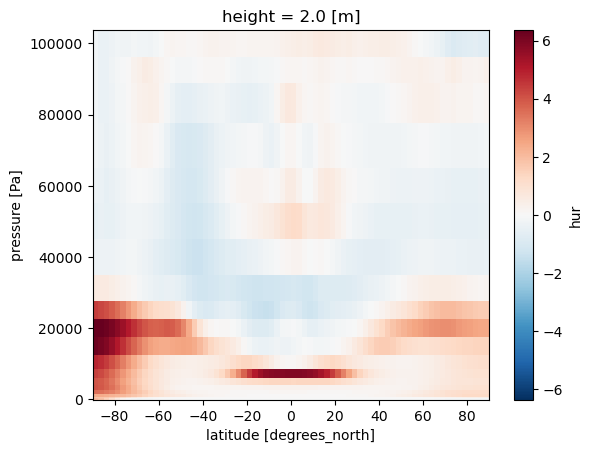

In [72]:
ds.hur.mean('time').mean('lon').plot()

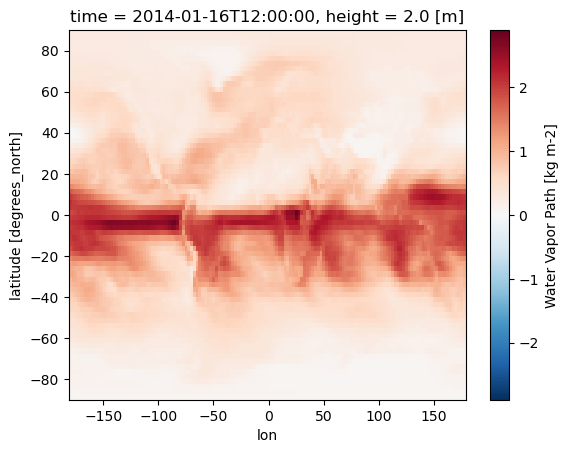

In [116]:
ds.prw[0].plot()

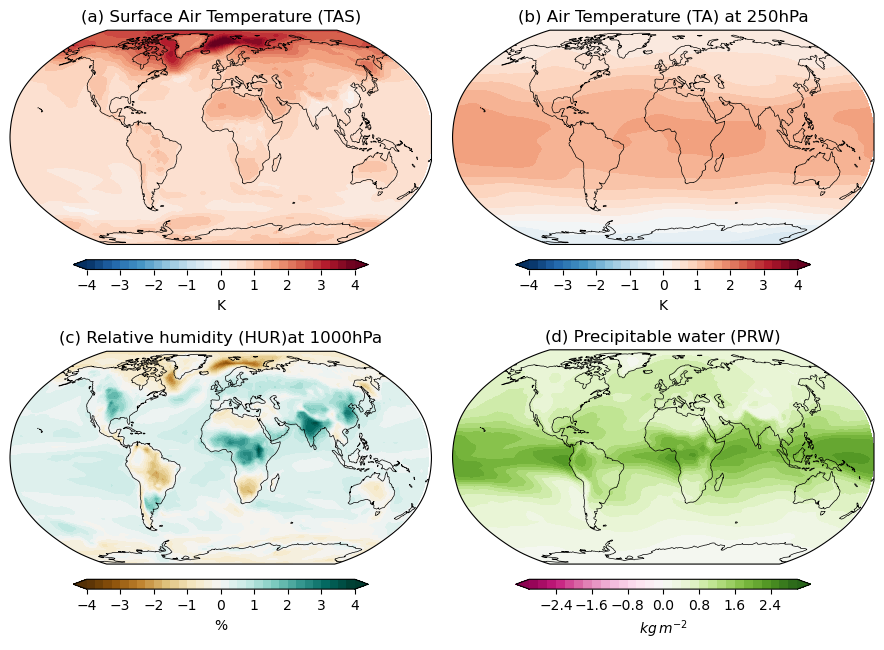

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

plt.rcParams['text.usetex'] = False
# Create subplots with shared y-axis and manually share x-axis
f, axes = plt.subplots(2, 2, figsize=(9,6.5), subplot_kw=dict(projection=ccrs.Robinson()))

# Assuming Natl is your xarray dataset containing latitude and longitude coordinates
# minima_indices is the indices of the minima obtained earlier
latitudes = ds['lat'].values
longitudes = ds['lon'].values
nLons = np.arange(-180, 180.1, 60)
nLats = np.arange(-90, 90.1, 30)

axes = axes.flatten()
    
var1 = ds.tas.mean('time')
axes[0].set_title('(a) Surface Air Temperature (TAS)')
tas_plot = axes[0].contourf(longitudes, latitudes, var1, cmap='RdBu_r', levels=np.arange(-4,4.1,0.25), extend='both', transform=ccrs.PlateCarree()) 
cbar1 = plt.colorbar(tas_plot, ax=axes[0], label='K', pad=0.05, orientation='horizontal', shrink=0.7, aspect=30)

var2 = ds.ta.sel(plev=25000).mean('time')
axes[1].set_title('(b) Air Temperature (TA) at 250hPa')
ta_plot = axes[1].contourf(longitudes, latitudes, var2, cmap='RdBu_r', levels=np.arange(-4,4.1,0.25), extend='both', transform=ccrs.PlateCarree()) 
cbar2 = plt.colorbar(ta_plot, ax=axes[1], label='K', pad=0.05, orientation='horizontal', shrink=0.7, aspect=30)

var3 = ds.hur.sel(plev=100000).mean('time')
axes[2].set_title('(c) Relative humidity (HUR)at 1000hPa')
hur_plot = axes[2].contourf(longitudes, latitudes, var3, cmap='BrBG', levels=np.arange(-4,4.1,0.25), extend='both', transform=ccrs.PlateCarree()) 
cbar3 = plt.colorbar(hur_plot, ax=axes[2], label='%', pad=0.05, orientation='horizontal', shrink=0.7, aspect=30)

var4 = ds.prw.mean('time')
axes[3].set_title('(d) Precipitable water (PRW)')
prw_plot = axes[3].contourf(longitudes, latitudes, var4, cmap='PiYG', levels=np.arange(-3,3.1,0.2), extend='both', transform=ccrs.PlateCarree()) 
cbar4 = plt.colorbar(prw_plot, ax=axes[3], label=r'$kg \, m^{-2}$', pad=0.05, orientation='horizontal', shrink=0.7, aspect=30)


for ax in axes:
    ax.set_aspect(1)
    ax.coastlines(lw=0.5, color='k')  

# Adjust size
f.subplots_adjust(hspace=0.05, wspace=0.05, left=0.02, right=0.98, bottom=0.02, top=0.98)
#save figure
plt.savefig('annual_mean_pseudoglobalwarming_signal_applied.pdf',bbox_inches='tight')

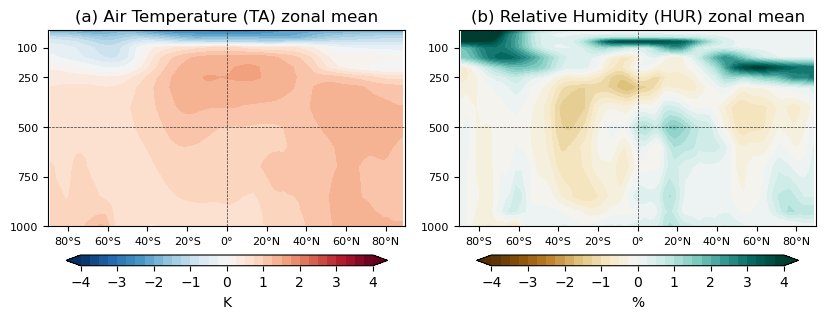

In [151]:
#zonal mean profiles

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

plt.rcParams['text.usetex'] = False
# Create subplots with shared y-axis and manually share x-axis
f, axes = plt.subplots(1, 2, figsize=(8,6))


axes = axes.flatten()
    
var1 = ds.ta.mean('lon')[7]
axes[0].set_title('(a) Air Temperature (TA) zonal mean')
ta_plot = axes[0].contourf(latitudes, var1.plev*0.01, var1, cmap='RdBu_r', levels=np.arange(-4,4.1,0.25), extend='both') 
cbar1 = plt.colorbar(tas_plot, ax=axes[0], label='K', pad=0.05, orientation='horizontal', shrink=0.9, aspect=30)

var2 = ds.hur.mean('lon')[7]
axes[1].set_title('(b) Relative Humidity (HUR) zonal mean')
hur_plot = axes[1].contourf(latitudes, var2.plev*0.01, var2, cmap='BrBG', levels=np.arange(-4,4.1,0.25), extend='both') 
cbar2 = plt.colorbar(hur_plot, ax=axes[1], label='%', pad=0.05, orientation='horizontal', shrink=0.9, aspect=30)

x_ticks = np.arange(-80,81,20)
y_ticks = [1000,750,500,250,100]

for ax in axes:
    # set the ticks
    ax.set_xticks(x_ticks)
    ax.set_xlim(-90, 90)
    #ax.set_yticklabels(x_ticks, rotation=45)
    #ax.set_yscale('log')   
    ax.set_yticks(y_ticks)  
    ax.set_ylim(1000, 10)
    ax.set_yticklabels(y_ticks, rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=8)
   
    ax.axvline(0, color='0.2',ls="--", lw=0.5)
    ax.axhline(500, color='0.2',ls="--", lw=0.5)
    ax.set_aspect(0.1)
    
    # format the ticks as e.g 60°W
    ax.xaxis.set_major_formatter(LatitudeFormatter())

# Adjust size
f.subplots_adjust(hspace=0.05, wspace=0.15, left=0.02, right=0.98, bottom=0.02, top=0.98)
#save figure
plt.savefig('ZM_August_mean_pseudoglobalwarming_signal_applied.pdf',bbox_inches='tight')